# The most demanded skills in the data science market for the city of Barcelona

This is the analysis that accompanies the blog post "The most demanded skills in the data science market for the city of Barcelona" published in the website Medium on February 2019.

https://medium.com/@RS_stats/the-most-demanded-skills-in-the-data-science-market-for-the-city-of-barcelona-bb09567c710e

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import codecs
import seaborn as sns

## Define functions to count word frequencies

I found the blog post from Isai [B. Cicourel](https://www.codementor.io/isaib.cicourel/word-frequency-in-python-e7cyzy6l9) very helpful to calculate word frequencies in Python. These functions are taken from his blog post. Later I discovered that Scikit-Learn has a wonderful set of tools to analyze text data easily. See this [link from Jason Brownlee](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/) for a nice description and how to use them.

In [4]:
# Define function tokenize. This functions split the words of a text and converts them to lowercase
def tokenize():
    if book is not None:
        words = book.lower().split()
        return words
    else:
        return None
        
# Define function map_book. Counts the frequency of the words inside tokens 
def map_book(tokens):
    hash_map = {}

    if tokens is not None:
        for element in tokens:
            # Remove Punctuation
            word = element.replace(",","")
            word = word.replace(".","")

            # Word Exist?
            if word in hash_map:
                hash_map[word] = hash_map[word] + 1
            else:
                hash_map[word] = 1

        return hash_map
    else:
        return None

# Read CSV files on a pandas dataframe

In [19]:
folder = '/Users/rs-stats/Dropbox/WordCount/WebScraperJobs/mix/DataFrame.csv'

df = pd.read_csv(folder, sep =";")
df.head()

,job_Name,job_Company,job_Description_File
0,Senior Backend Developer - Data Science,Networkers,File_0.txt
1,Project Planning Officer - Relocate to Belgium,Daikin,File_1.txt
2,Data Science Intern,Cien,File_2.txt
3,Data Science Internship,King,File_3.txt
4,Data Science,Zurich Insurance Group,File_4.txt


# Cleaning data

This dataframe is the combination of searching the Indeed web with the terms "data science" and "data scientist". Therefore, some of the job postings are duplicated (i.e. they appeared in both searches). In this section I eliminated those rows that share job name and job company. I obtained 131 rows.

In [22]:
df2 = df.drop_duplicates(subset = ['job_Name', 'job_Company']) #Drop duplicates
df2.shape

(131, 3)

# Word frequency analysis of technical skills

In this section I count the word frequency of data science skills (e.g. "Python", "R", "Spark", etc...) that appear in each job description. After defining the list of words to analyze, I create a new dataframe (df3) in which each column is one of these words. Then, I iterate over the job description files to get the frequency the data science skills and we store the data in df3. "Python" and "R"  appear together in many job descriptions. I create a new column to count those cases. Later I replace NaNs with zeros in a new dataframe (df4). Some words like "Python" appear twice or more in some job descriptions. I count them only once and put the results in a final dataframe (df5). Finally, I plot the data!

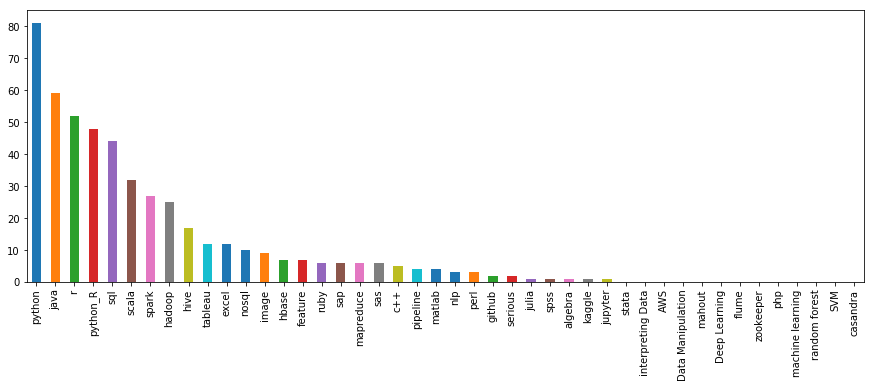

In [13]:

# List of words to analyze
word_list = ['python','r','sql', 'hadoop', 'spark', 'java', 'c++', 'matlab', 'sas', 'stata',
             'hive', 'excel', 'perl', 'ruby', 'spss', 'hbase', 'image', 'mapreduce', 'mahout', 
             'tableau', 'scala', 'casandra', 'flume', 'zookeeper', 'sap', 'serious', 'php',
             'machine learning', 'random forest', 'SVM', 'pipeline', 'AWS', 'Deep Learning', 
             'jupyter', 'Data Manipulation', 'interpreting Data', 'algebra', 'feature', 'nlp', 
             'nosql', 'julia', 'kaggle', 'github']


# Create a new dataframe in which each column is a word taken from the previous word_list
df3 = pd.concat([df2,pd.DataFrame(columns = word_list)],  sort = False)


# Iterate over the job description files
for index, row in df3.iterrows():

    # Get the file neme where the job is stored
    filePath = row['job_Description_File'] 

    # Open the file
    file = codecs.open('/Users/rs-stats/Dropbox/WordCount/WebScraperJobs/mix/' + filePath, 'r', encoding='utf-8')
    
    # Read the file and close it
    book = file.read()
    file.close()
    
    # Tokenize the words (sepate each word and convert to lowercase) and count the frequency for a given file
    words = tokenize()
    map = map_book(words)
    
    # Store word frequency in the dataframe 
    for word in word_list:
        df3.loc[index, word] = map.get(word, np.nan)

        
# "Python" and "R"  appear together in many job descriptions. I create a new column to count those cases.
df3['python_R'] = df3['python']*df3['r']

# I replace NaNs with 0 in a new dataframe (df4)
df4 = df3.fillna(0)

# Some words like "Python" appear twice or more in some job descriptions. 
# I count them only once in a new dataframe (df5)
df5= df5.clip(0,1) 

# Plot columns with Pandas plots.
df5 = df4.drop(['job_Name', 'job_Company', 'job_Description_File'],axis=1)
df5.sum().sort_values(ascending = False).plot.bar(figsize=(15, 5))
